In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## SVD for Dimensionality Reduction

## Introduction
There are a few techniques to actually perform the reduction.  In this portion of the sprint we will use Singular Value decomposition (SVD) to deconstruct a feature matrix and perform a dimensionality reduction.

#### Dataset
We will be using a [book review](http://www2.informatik.uni-freiburg.de/~cziegler/BX/) dataset.  To make the matrix decomposition a little more tractable in the given time, the data files have already been joined and a sample of users and books have been taken.

There are 6100 books and 2500 users in the `data/book_reviews.csv`.  Each row corresponds to a given user's rating of a book.

## Basic
### Part 1: Prepare the data
A common technique for both improving the quality of a recommendation as well as handling sparse data is matrix factorization.  We will be using Singular value decomposition ([SVD](http://en.wikipedia.org/wiki/Singular_value_decomposition)) to factor our reviews matrix.  This has the effect of reducing the dimension of our feature space and also uncovers latent features (similar to the topics from our document clustering): if we are talking about book reviews, latent features might correspond to given genres or styles.

1. Load in the `data/book_reviews.csv` data file to a dataframe.

In [2]:
ratings = pd.read_csv('data/book_reviews.csv')

In [3]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,277195,0060391626,10
1,277195,0060502258,0
2,277195,0060987561,0
3,277195,0316666343,0
4,277195,0316734837,0


In [4]:
ratings.shape

(220995, 3)

2. Once the data is loaded we need to transform it into a feature matrix.  [Pivot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html) the data such that each row represents a user, and each column (feature) represents their review of that book.  Represent missing data by a value of -1.

In [5]:
pv = ratings.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(-1)

In [6]:
pv.head()

ISBN,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
User-ID,,,,,,,,,,,,,,,,,,,,,
243,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
254,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
507,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
638,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
805,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


### Part 2: Factor the Matrices

#### SVD

Let us define:

* __m__: # of users
* __n__: # of items
* __k__: # of latent features (also rank of __A__)

We will be trying to decompose our rating matrix into 3 component matrices:

![http://www.shermanlab.com/science/CS/IR/DiracFockIR2/DiracFockRiemannAndIR_files/image002.gif](http://www.shermanlab.com/science/CS/IR/DiracFockIR2/DiracFockRiemannAndIR_files/image002.gif)

* **A** is our user-book rating matrix (__m__ x __n__)

    * **U** is our _weights_ matrix (__m__ x __k__)
    * **S** is our singular values matrix (__k__ x __k__)
    * and **V*** is our features matrix (__k__ x __n__)

The larger the singular value (**S** matrix), the more important that latent feature.  Since **U** and **V** are orthogonal to each other, we can rearrange them in order of decreasing singular values.  If we want to reduce the dimension, we simply set a threshold for which columns/rows to cut off (low rank approximation):

You can think of the weights matrix as representing how much of each latent feature corresponds to each user, and the features matrix as how much of each item/rating contributes to the latent features.

1. Using numpy's [SVD](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) method, decompose our rating matrix into 3 component matrices.

    Now that we have our component matrices, we would like to inspect the decomposition and determine how many dimensions we should keep.  This is the same process as what we did this morning for the MNIST dataset with the scree-plot.

In [7]:
U,sigma,VT = np.linalg.svd(pv.values)

2. First calculate the power that each singular value represents.  Power is the same as variance of a dimension and we can compute it simply by squaring the singular values.

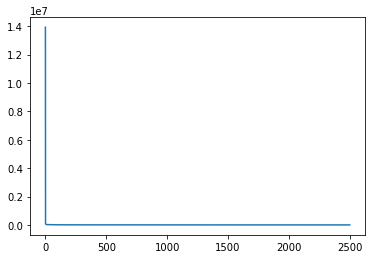

In [8]:
plt.plot(sigma ** 2);

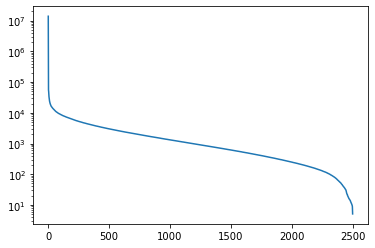

In [9]:
plt.plot(sigma ** 2)
plt.yscale('log');

In [10]:
sigma[:10]

array([3731.97976866,  328.16360612,  234.17776569,  225.39414397,
        207.50068729,  193.36447739,  182.80484561,  175.66520289,
        167.16553765,  156.86709103])

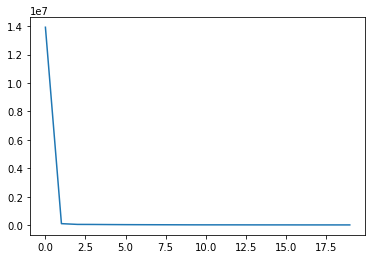

In [11]:
plt.plot(sigma[:20] ** 2);

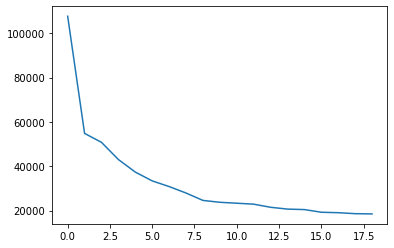

In [12]:
plt.plot(sigma[1:20] ** 2);

3.  Total power is the sum of the power of each singular value.  Plot the power of each singular value and look for the 'elbow'.  How many singular values should you keep?

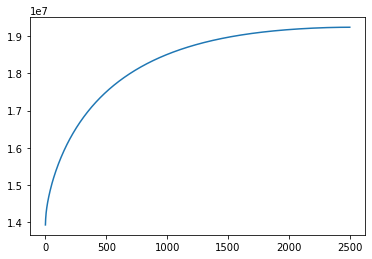

In [13]:
cumulative = np.cumsum(sigma ** 2)
plt.plot(cumulative);

4.  The reason we might be interested in total power is to have some sense of the information loss of our transformation.  Plot how the total power varies as you add additional singular values, i.e. plot total power of SV1<sup>2</sup>, SV1<sup>2</sup> + SV2<sup>2</sup>, SV1<sup>2</sup> + SV2<sup>2</sup> + SV3<sup>2</sup>, etc.  This is equivalent to the cumulative sum of the squares of the singular values.

In [14]:
total_power = np.sum(sigma ** 2)

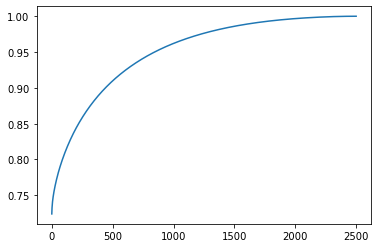

In [15]:
plt.plot(cumulative/total_power);

5.  How many singular values do you need to keep to retain 90% of the total power?

In [16]:
total_power * .9

17314294.50000005

In [17]:
# looks like ~440
cumulative[425:445]

array([17261873.92349738, 17265354.08239685, 17268816.13136247,
       17272273.691154  , 17275722.03438528, 17279165.46728177,
       17282599.88202247, 17286020.70480273, 17289440.27780599,
       17292852.56226964, 17296256.7960287 , 17299656.24063945,
       17303052.33343218, 17306439.78265789, 17309814.71885879,
       17313189.45027924, 17316559.90856211, 17319922.37561759,
       17323274.23944456, 17326613.64580775])

In [18]:
cumulative[425:445]/total_power

array([0.89727517, 0.89745607, 0.89763603, 0.89781575, 0.897995  ,
       0.89817399, 0.89835251, 0.89853032, 0.89870807, 0.89888544,
       0.8990624 , 0.8992391 , 0.89941563, 0.89959171, 0.89976714,
       0.89994256, 0.90011776, 0.90029254, 0.90046677, 0.90064035])

## Advanced

### Part 3: Examine the Topics

 Now that we have decomposed our matrices, let us try to examine the 'concept/topic' space.  Each row of U connects users to concepts, and each row of V<sup>T</sup> connects concepts to books.  Examine U and V<sup>T</sup>.

6. Pick a number of singular values to keep (you'll be evaluating latent topics by eye, so keep it to 10 or so).  Look at V to find which books most contribute to each 'topic'.  For each of these 'topics', print out the title and author of the 10 most relevant books.  __Note: You can get the book metadata from the `data/book_meta.csv` file__  Use:

      ```python
      meta_data = pd.read_csv('data/book_meta.csv', sep=";", error_bad_lines=False, encoding='latin1')
      ```


In [19]:
# keep 10 topics

V_10 = VT[:10,:]

In [20]:
U_10 = U[:,:10]

In [21]:
books = pd.read_csv('data/book_meta.csv', sep=';', error_bad_lines=False, encoding='latin1')

/Users/danielrupp/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
books = books.set_index('ISBN')

In [23]:
books.head()

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,two,three
ISBN,,,,,,,,,
0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN
0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN
0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN
0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN,NaN
0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN


In [24]:
def print_titles(topic, n):
    idx = np.argsort(topic)
    reverse_idx = idx[::-1]
    for i in pv.columns[reverse_idx[:n]]:
        try:
            print(books.loc[i,'Book-Title'] + " : " + books.loc[i,'Book-Author'])
        except Exception:
            continue

In [25]:
V_10[0]

array([0.0131897 , 0.01282525, 0.01330851, ..., 0.01335105, 0.0133207 ,
       0.01336193])

In [26]:
V_10[1]

array([-0.00760107,  0.01572755, -0.01055016, ..., -0.01050403,
       -0.0074521 , -0.00762351])

In [27]:
for i in range(len(V_10)):
    print("Topic #{} :".format(i))
    print("\n")
    print_titles(np.abs(V_10[i]), 10)
    print("\n")

Topic #0 :


Name Der Rose : Umberto Eco
Monsieur Ibrahim und die Blumen des Koran. ErzÃ?Â¤hlung. : Eric-Emmanuel Schmitt
Artemis Fowl. : Eoin Colfer
Novocento, Un Monologo : Alessandro Baricco
Schlafes Bruder : Robert Schneider
New Vegetarian: Bold and Beautiful Recipes for Every Occasion : Celia Brooks Brown
Der Alchimist. : Paulo Coelho
Die Weiss Lowin / Contemporary German Lit : Henning Mankell
Crazy : Benjamin Lebert
Free : Paul Vincent


Topic #1 :


The Red Tent (Bestselling Backlist) : Anita Diamant
The Lovely Bones: A Novel : Alice Sebold
The Da Vinci Code : Dan Brown
Where the Heart Is (Oprah's Book Club (Paperback)) : Billie Letts
Two for the Dough : Janet Evanovich
Snow Falling on Cedars : David Guterson
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) : J. K. Rowling
1st to Die: A Novel : James Patterson
Good in Bed : Jennifer Weiner
Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson : MITCH ALBOM


Topic #2 :


The Red Tent (Bestsell

7. What does each concept represent?  Can you give them names based on which books comprise them?

8. Do the same for the users.  How much of each concept does the first user like?

In [28]:
U_10[0]

array([-0.02033966,  0.00327259, -0.0055954 ,  0.00288085, -0.0019582 ,
        0.00617848, -0.01451267,  0.00338496, -0.00870693,  0.00158482])

In [29]:
U_10[0].argmax()

5

In [30]:
# User likes topic 5 

print_titles(V_10[5], 15)

The Lovely Bones: A Novel : Alice Sebold
The Da Vinci Code : Dan Brown
To the Nines: A Stephanie Plum Novel : Janet Evanovich
The Five People You Meet in Heaven : Mitch Albom
1st to Die: A Novel : James Patterson
The Last Juror : John Grisham
2nd Chance : James Patterson
Four Blind Mice : James Patterson
No Second  Chance : Harlan Coben
Full House (Janet Evanovich's Full Series) : Janet Evanovich
Seven Up (A Stephanie Plum Novel) : Janet Evanovich
The Lake House : James Patterson
Blow Fly: A Scarpetta Novel : Patricia Cornwell
Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel) : Janet Evanovich
From a Buick 8 : A Novel : Stephen King


## Extra Credit

### Part 4: Visualizing High-Dimensional Data

We have touched on many of the issues and treatments of dealing with data that has many dimensions for modeling purposes.  This last section will focus on trying to better understand our data through visualization.  One technique that is often employed to visualize data of arbitrary dimensions is [Multidimensional Scaling](http://en.wikipedia.org/wiki/Multidimensional_scaling) (MDS).  The basic idea of MDS is to compute similarity in an arbitrarily high dimension (the dimension of your original data) and project this into a two dimensional space in a way to preserve distances.  Basically the points in 2-D space should have the same distances between them as they had in the higher dimensional space.

One classic application of MDS is to visualize voting patterns in the senate.  This is probably so because people love betting on bills like they bet on horse races, but also the senate is a classic example of a partisan 'user base'. We will be working with data from [Vote View](http://www.voteview.com/) and the data dictionary of the structure can be found [here](http://www.voteview.com/senate101.htm).  We will be looking at the Senate votes from the 101-111th senates (1989-2009). Each row of the data corresponds to a single senator and his/her votes for that session of the senate.

Lets see if we can discover anything interesting in the way our senators voted in the 90s!

1.  Load in the data from `data/senate/*`, making one data frame for each session (you could store these data frames in a dictionary, or make one large dataframe and add another index for session).

In [31]:
from sklearn.manifold import MDS
from statsmodels.iolib.foreign import genfromdta
import os
from scipy.spatial import distance
import re
import math

In [32]:
cong = {}

for file_n in os.listdir('data/senate'):
    senate = file_n.split('.')[0]
    cong[senate] = pd.read_csv('data/senate/' + file_n)

In [33]:
cong['s101'].head()

,Unnamed: 0,cong,id,state,dist,lstate,party,eh1,eh2,name,...,V629,V630,V631,V632,V633,V634,V635,V636,V637,V638
0,1,101,99908,99,0,USA,200,0,0,BUSH,...,9,9,9,9,9,9,9,9,9,1
1,2,101,14659,41,0,ALABAMA,100,0,1,"SHELBY, RIC",...,1,1,1,1,1,1,1,1,1,6
2,3,101,14705,41,0,ALABAMA,100,0,1,"HEFLIN, HOW",...,1,1,1,1,1,1,1,1,1,6
3,4,101,12109,81,0,ALASKA,200,0,1,"STEVENS, TH",...,1,1,1,1,6,6,1,1,1,1
4,5,101,14907,81,0,ALASKA,200,0,1,"MURKOWSKI,",...,1,1,1,1,6,6,1,1,1,6


2. Now that we have our data in a form that is easy to manipulate we need to convert the voting codes.  They are currently on a more complex 0-9 scale, but we should put them on a Yay (1), Nay (-1), abstain (0) scale.  Map every vote accordingly:
  * 1,2,3 -> 1
  * 4,5,6 -> -1
  * 7,8,9,0 -> 0   
  
While scikit-learn's [MDS](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) can precompute distances for us, it is unfortunately only limited to Euclidean distance.  It does however let us precompute our own distance calculation.


In [34]:
mapping = {1:  1,
           2:  1,
           3:  1,
           4: -1,
           5: -1,
           6: -1,
           7:  0,
           8:  0,
           9:  0,
           0:  0}

def transformers(df):
    cols = [ c for c in df.columns if c[0].lower() == 'v']
    
    df[cols] = df[cols].applymap(lambda x: mapping[x])
    
for k in cong:
    transformers(cong[k])

In [35]:
cong[k].head()

,Unnamed: 0,cong,id,state,lstate,party,eh1,eh2,name,V1,...,V636,V637,V638,V639,V640,V641,V642,V643,V644,V645
0,1,109,99910,99,USA,200,NaN,NaN,BUSH,0,...,1,-1,1,0,1,0,1,0,0,1
1,2,109,49700,41,ALABAMA,200,0.0,1.0,SESSIONS,-1,...,1,-1,1,1,1,1,1,1,1,1
2,3,109,94659,41,ALABAMA,200,0.0,1.0,SHELBY,0,...,1,-1,1,0,1,1,1,1,1,1
3,4,109,40300,81,ALASKA,200,0.0,1.0,MURKOWSKI,0,...,1,-1,1,1,1,1,1,0,0,0
4,5,109,12109,81,ALASKA,200,0.0,1.0,STEVENS,-1,...,1,1,1,1,1,1,1,1,1,1


3. We are now ready to compute our distances.  Let us first start with the 101st session for now.  Extract all rows that correspond to the 101 Senate and using scipy's [pdist](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) create a similarity matrix of our senators.  Start with Euclidean for now.

In [51]:
roll = cong['s101']
cols = [ c for c in roll.columns if c[0].lower() == 'v'] 
dist = distance.pdist(roll[cols], metric='euclidean')
mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))

names = roll.name.values
dem = np.where(roll.party == 100)[0]
rep = np.where(roll.party == 200)[0]



4. Pass this matrix into scikit's [MDS](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) to compute the scaling (remember to tell it you precomputed the distances).    
    
5. Plot our senators in 2-D space.  Start with just points colored blue and red accordingly, but then see if you can instead plot their names so we know who is aligned where.

 ![mds](images/101MDS.png)

In [52]:
def plot_senate(mds):
    plt.figure(figsize = (12, 10))

    plt.plot(mds[:, 0], mds[:, 1], '.', alpha = 0)

    plt.title('Senators of the 101th Congress')

    for i in dem:
        plt.annotate(names[i], (mds[i, 0], mds[i, 1]),
                     color = 'blue',
                     alpha = 0.3)

    for i in rep:
        plt.annotate(names[i], (mds[i, 0], mds[i, 1]),
                     color = 'red',
                     alpha = 0.5)

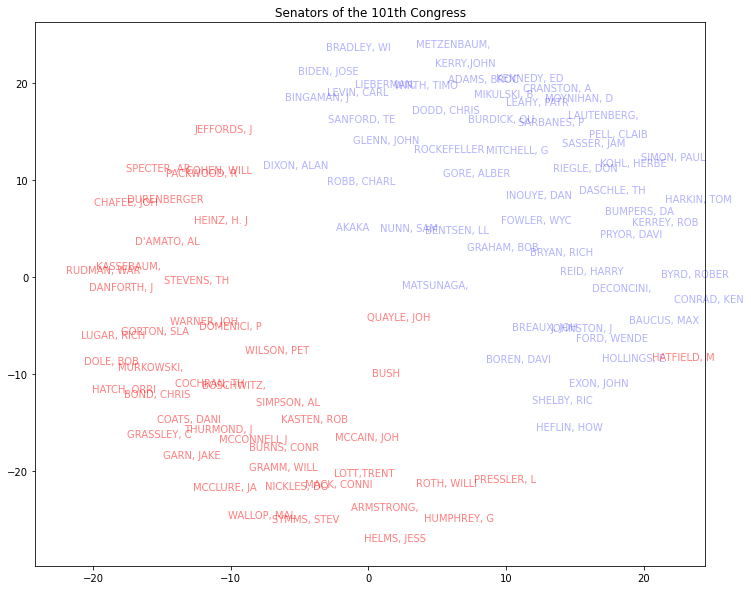

In [53]:
plot_senate(mds)

7. Try to experiment with different distance metrics and see if the plot you created change.

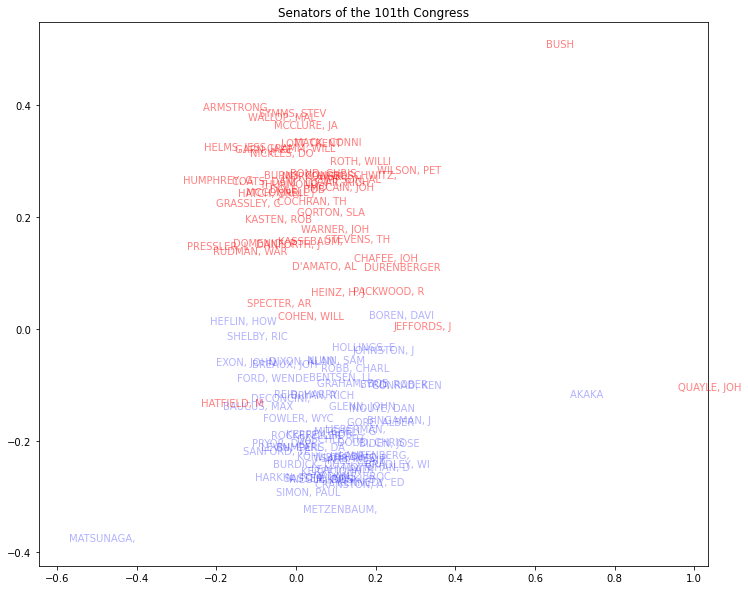

In [54]:
dist = distance.pdist(roll[cols], metric='jaccard')
mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))
plot_senate(mds)

6. Now repeat this for all of the senates in our dataset and track the evolution of partisanship in the Senate!
 ![all](images/allMDS.png)

[None]

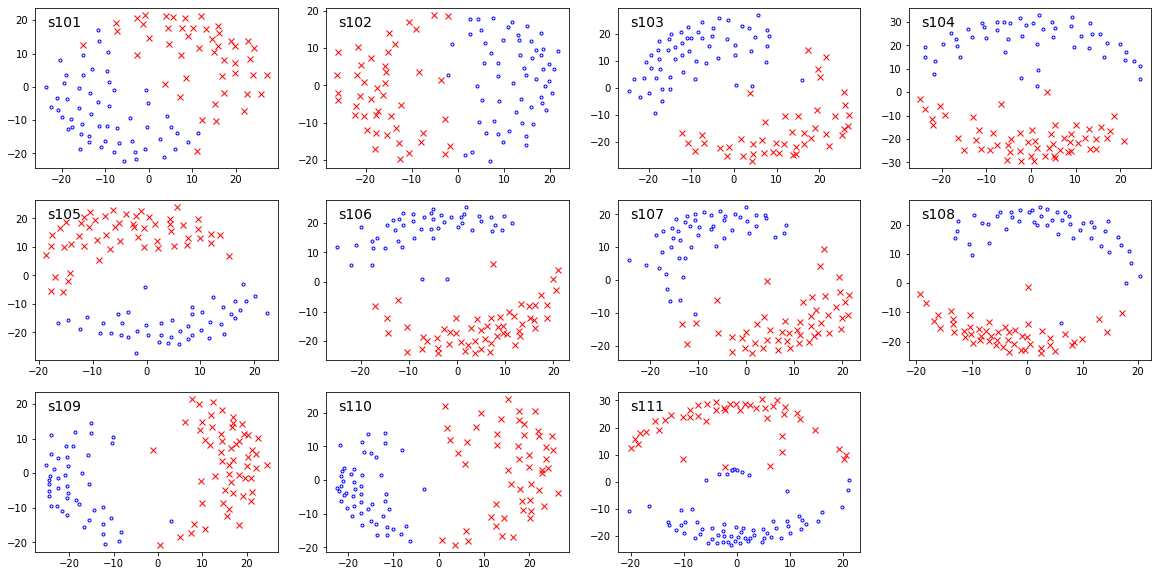

In [55]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 10))
for a, cn in zip(ax.ravel(), sorted(cong.items(), key=lambda x: int(x[0][1:]))):
    sen = cn[1]
    cols = [ c for c in sen.columns if c[0].lower() == 'v'] 
    dist = distance.pdist(sen[cols], metric='euclidean')
    mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))

    names = sen.name.values
    dem = np.where(sen.party == 100)[0]
    rep = np.where(sen.party == 200)[0]
    
    a.plot(mds[dem, 0], mds[dem, 1], '.b', mfc = 'white')
    a.plot(mds[rep, 0], mds[rep, 1], 'xr')
  
    a.text(0.05, .95, cn[0], transform = a.transAxes, verticalalignment = 'top', fontsize = 14)
    
plt.setp(ax[2, 3], visible = False) 

### Part 5: Interactive Plots

1. Instead of awkwardly visualizing our data points as the senators names, we can get the best of both worlds (interpretability and inspection) through interactivity! Using [plotly](https://plot.ly/python/) create the same [scatterplot](https://plot.ly/python/line-and-scatter/#Colored-and-Styled-Scatter-Plot) but with a hover interaction so the senators name (and other info) pops up in the tooltip. Plotly kinda defaults to this and gives it to us for free.

In [ ]:
import plotly
import plotly.tools as tls 
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, iplot_mpl

init_notebook_mode(connected=True)

iplot_mpl(fig)

In [ ]:
fig = tls.make_subplots(
    rows= 4,            # number of rows
    cols= 4,         # number of columns
    horizontal_spacing= 0.02,  # horiz. spacing (norm. coord)
    vertical_spacing= 0.02,    # vert. spacing (norm. coord)
    print_grid=True            # print axis grid ids to screen
)

In [ ]:
# Function to make list of subplot indices
def get_splts(N_rowcol, N_senate):

    N_splt=N_rowcol**2         # number of subplots
    N_empty=N_splt-N_senate   # number of empty subplots
    
    tmp1d=np.arange(1,N_splt+1)                 # => [1,2,..,N_splt]
    tmp2d=np.resize(tmp1d, (N_rowcol,N_rowcol)) # => [[1,2,..,N_rowcol],..[..,N_splt]]
    tmp2d_flip=tmp2d[::-1,:]                    # => [[..,N_spl],..[1,2,..,N_rowcol]]
    
    splts_left=tmp2d_flip[:,0]     # indices of the left-hand side subplots
    splts_bottom=tmp2d_flip[-1,:]  # indices of the bottom subplots
    
    tmp1d_in_order=tmp2d_flip.flatten().tolist()  # => [..,N_spl,..,1,2,..N_rowcol]
    
    splts_empty=range(N_rowcol-N_empty+2,N_rowcol+2)  # indices of empty subplots
    
    for splt in splts_empty:           
        tmp1d_in_order.remove(splt)  # remove indices of empty subplots  
    splts = tmp1d_in_order           #   and get the complete list of subplots
    
    return splts, splts_empty, splts_left, splts_bottom

# Get lists of subplot indices
splts, splts_empty, splts_left, splts_bottom = get_splts(4, 11)

print(splts)  # print list

In [ ]:
traces = []

for i, cn in enumerate(sorted(cong.items(), key=lambda x: int(x[0][1:]))):
    sen = cn[1]
    cols = [ c for c in sen.columns if c[0].lower() == 'v'] 
    dist = distance.pdist(sen[cols], metric='euclidean')
    mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))

    names = sen.name.values
    dem = np.where(sen.party == 100)[0]
    rep = np.where(sen.party == 200)[0]
    
    names[i], (mds[i, 0], mds[i, 1])
    
    trace1 = Scatter(
        x=mds[rep, 0],
        y=mds[rep, 1],
        text=names[rep],
        mode='markers',
        xaxis='x' + str(i),
        yaxis='y' + str(i),
        marker=Marker(color="red")
        )
    
    trace2 = Scatter(
        x=mds[dem, 0],
        y=mds[dem, 1],
        text=names[dem],
        mode='markers',
        xaxis='x' + str(i),
        yaxis='y' + str(i),
        marker=Marker(color="blue")
        )
    
    traces.append(trace1)
    traces.append(trace2)

layout = Layout(
    xaxis=XAxis(
        domain=[0, 0.45]
    ),
    yaxis=YAxis(
        domain=[0, 0.45]
    ),
    xaxis2=XAxis(
        domain=[0.55, 1]
    ),
    xaxis3=XAxis(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=XAxis(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=YAxis(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=YAxis(
        domain=[0.55, 1]
    ),
    yaxis4=YAxis(
        domain=[0.55, 1],
        anchor='x4'
    )
)

data = Data(traces)
fig = Figure(data=data)

iplot(data, filename='senate partisanship')